# Train R2019 2010

# imports

In [1]:
import os 
import shutil
from pkg_resources import resource_filename

from ulmo.models import DCAE, ConditionalFlow
from ulmo.ood import ood

Cartopy not installed.  Some plots will not work!


# Init Model

In [2]:
dpath = '/home/jovyan/Oceanography/SST-OOD'
datadir= os.path.join(dpath, 'Models', 'R2019_2010_128x128_std')
model_file = os.path.join(resource_filename('ulmo', 'models'), 'options', 'pae_model_std.json')
preproc_file = os.path.join(dpath, 'PreProc', 'MODIS_R2019_2010_95clear_128x128_preproc_std.h5')

# Do it
pae = ood.ProbabilisticAutoencoder.from_json(model_file, 
                                             filepath=preproc_file,
                                             datadir=datadir, logdir=datadir)

In [11]:
os.makedirs(datadir)

# Train the AutoEncoder

135,680 training samples. 542,720 validation samples.


Training stopped. Save model (y/n)? y


Model saved.
Loading autoencoder model from: /home/jovyan/Oceanography/SST-OOD/Models/R2019_2010_128x128_std/autoencoder.pt


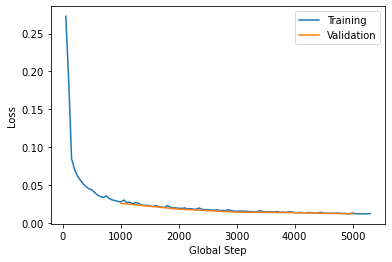

In [15]:
pae.train_autoencoder(n_epochs=10, batch_size=256, lr=2.5e-3, summary_interval=50, eval_interval=1000)

# Save the model params

In [17]:
shutil.copyfile(model_file, os.path.join(datadir, 'model.json'))

'/home/jovyan/Oceanography/SST-OOD/Models/R2019_2010_128x128_std/model.json'

# Flow

Existing latents file found. Use file (y) or recompute (n)? y


135,680 training samples. 542,784 validation samples.


Training stopped. Save model (y/n)? y


Model saved.
Loading flow model from: /home/jovyan/Oceanography/SST-OOD/Models/R2019_2010_128x128_std/flow.pt


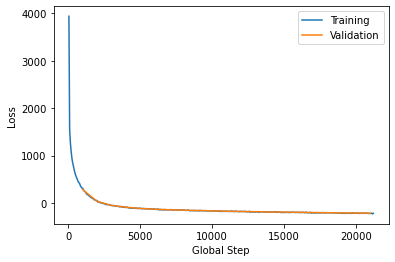

In [3]:
pae.train_flow(n_epochs=10, batch_size=64, lr=2.5e-4, summary_interval=50, eval_interval=1000)

# Probabilities

136,192 training samples. 543,744 validation samples.


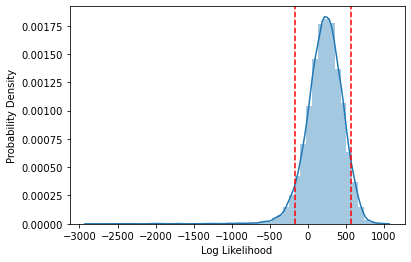

In [4]:
pae.plot_log_probs()

# Plot

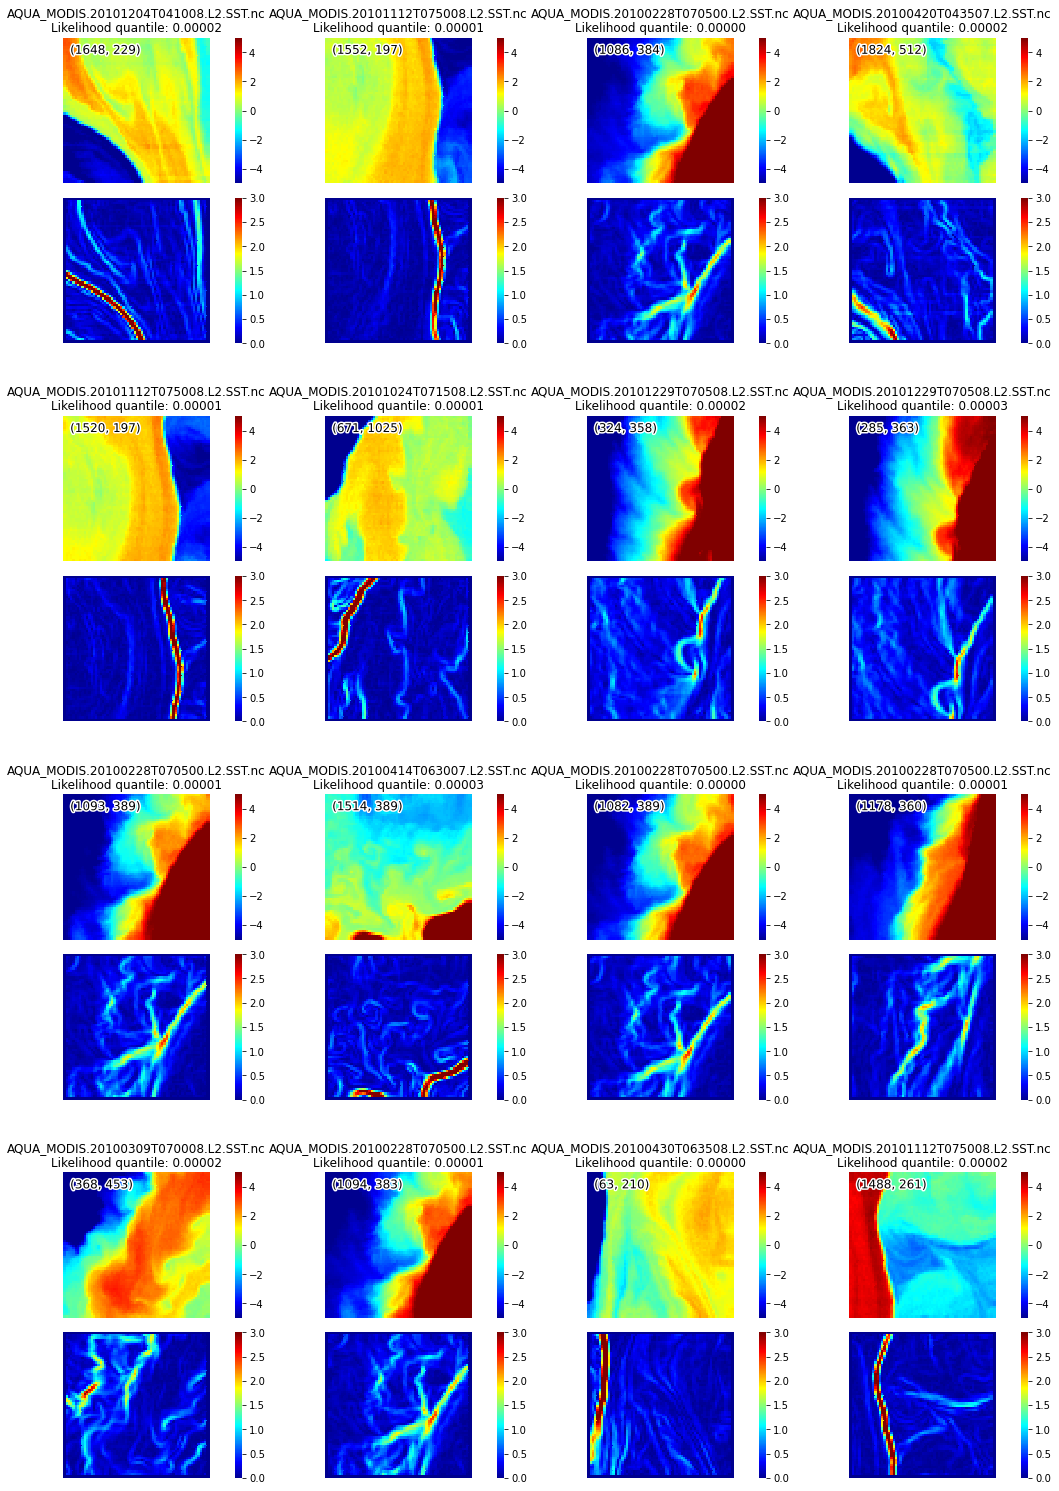

In [6]:
pae.plot_grid('least likely', vmin=-5, vmax=5, grad_vmax=3, save_figure=True)

# Save

In [5]:
pae.save_log_probs()

Saved log probabilities to /home/jovyan/Oceanography/SST-OOD/Models/R2019_2010_128x128_std/MODIS_R2019_2010_95clear_128x128_preproc_std_log_probs.csv.
